In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('tested.csv')

In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
352,1244,0,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
107,999,0,3,"Ryan, Mr. Edward",male,NaN,0,0,383162,7.7500,NaN,Q
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
31,923,0,2,"Jefferys, Mr. Clifford Thomas",male,24.0,2,0,C.A. 31029,31.5000,NaN,S
374,1266,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S


In [4]:
df.shape

(418, 12)

In [5]:
df.drop(columns=['Name'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.duplicated().sum()

0

# Data Visualization

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

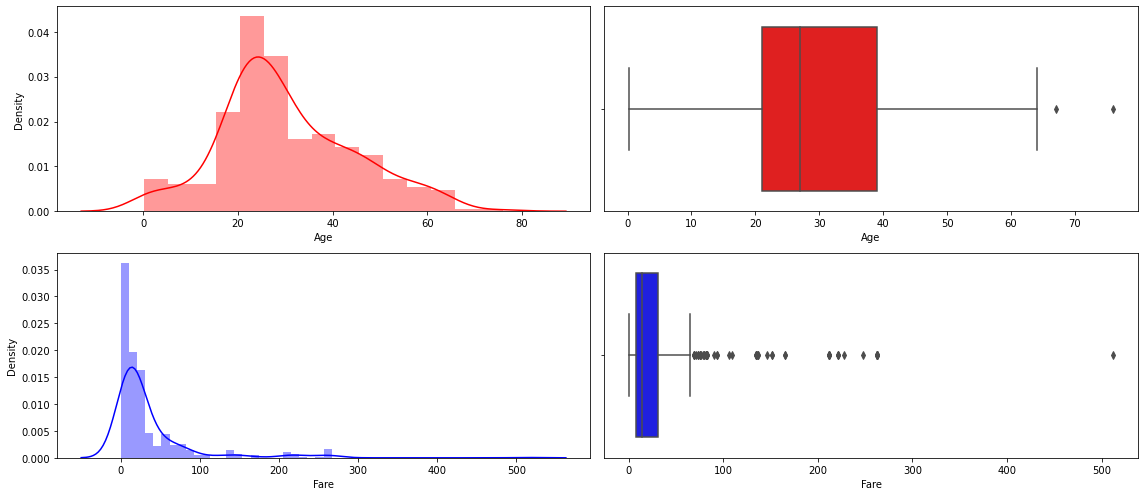

In [9]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Age'],color='Red')
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='Red')

plt.subplot(2,2,3)
sns.distplot(df['Fare'],color='Blue')
plt.subplot(2,2,4)
sns.boxplot(df['Fare'],color='Blue')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sex')

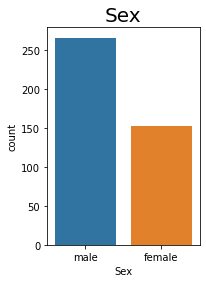

In [10]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=df)
plt.title("Sex", fontsize=20)

<AxesSubplot:ylabel='Sex'>

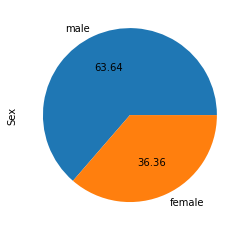

In [11]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

(array([ 32., 168.,  80.,  42.,  10.]),
 array([ 0.17 , 15.336, 30.502, 45.668, 60.834, 76.   ]),
 <BarContainer object of 5 artists>)

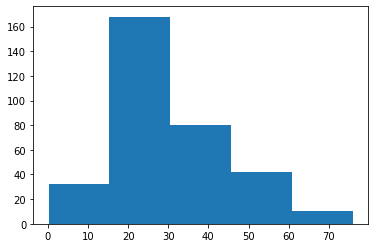

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=5)

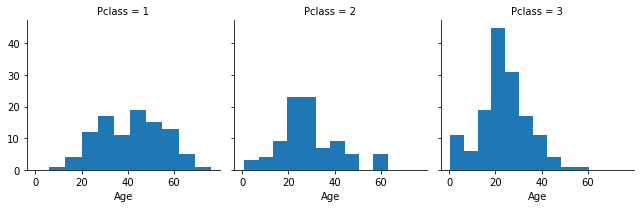

In [13]:
g = sns.FacetGrid(df, col="Pclass")
g = g.map(plt.hist, "Age")


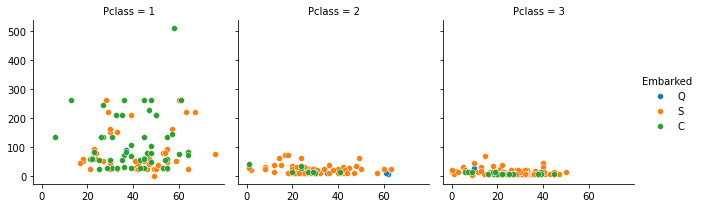

In [14]:
g = sns.FacetGrid(df, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


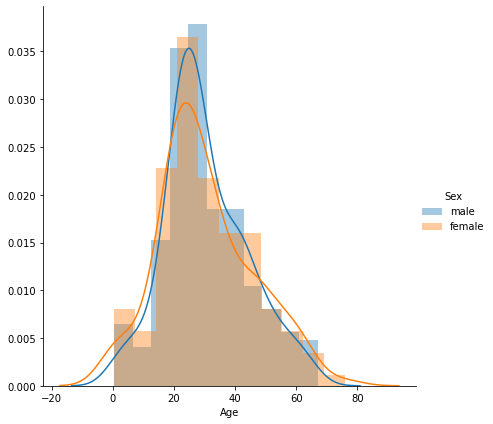

In [15]:
sns.FacetGrid(df, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

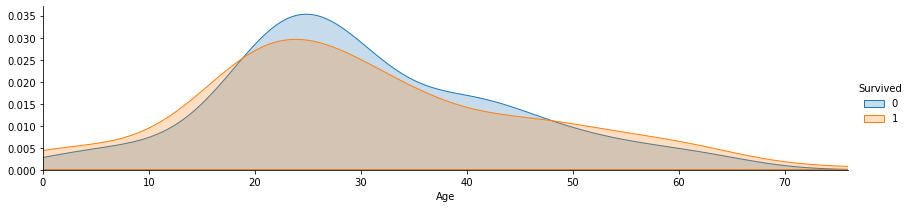

In [16]:
fig = sns.FacetGrid(df, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

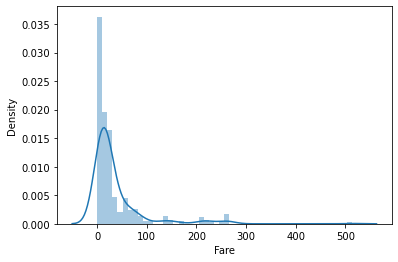

In [17]:
sns.distplot(df['Fare'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

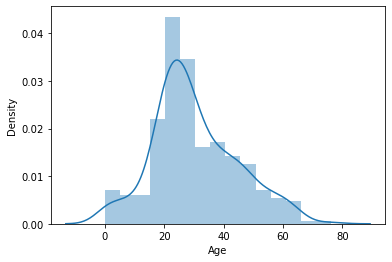

In [18]:
sns.distplot(df['Age'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

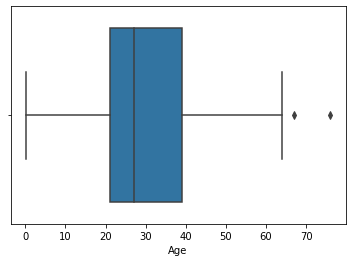

In [19]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

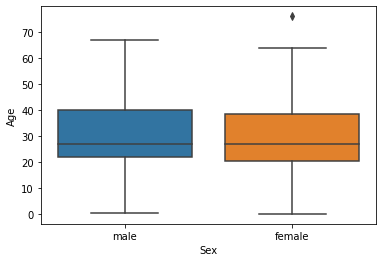

In [20]:
sns.boxplot(x='Sex', y = 'Age',data= df)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

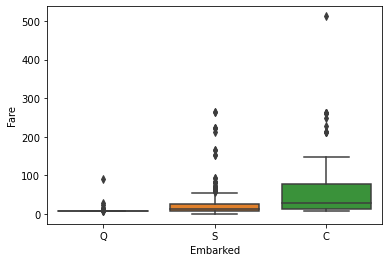

In [21]:
sns.boxplot(y="Fare", x="Embarked",data= df)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

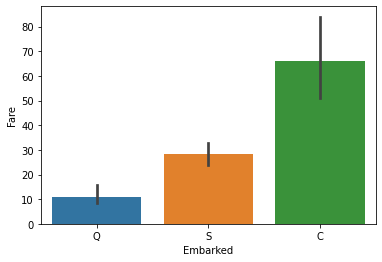

In [22]:
sns.barplot(y='Fare',x='Embarked',data=df)

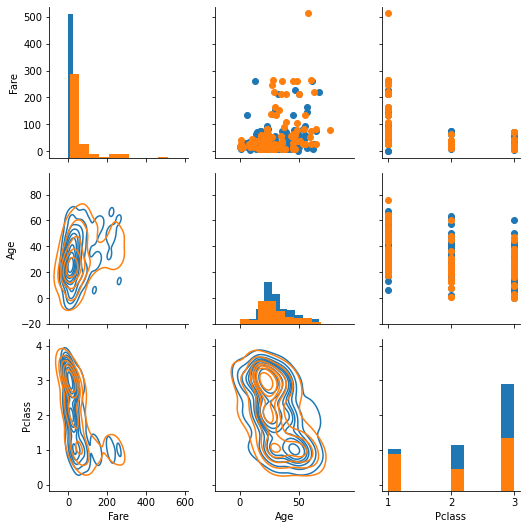

In [23]:
titanic_g = sns.PairGrid(df,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

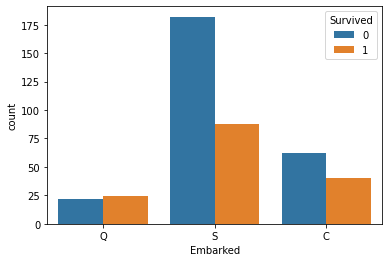

In [24]:
sns.countplot(data = df,x= 'Embarked',hue='Survived')

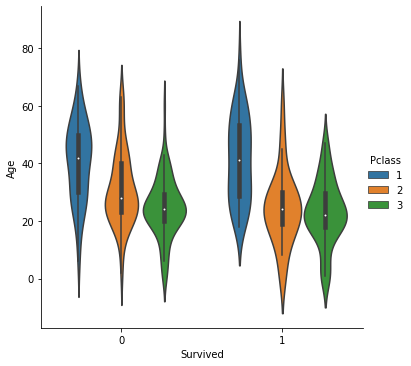

In [25]:
sns.catplot(data=df,x='Survived',y='Age',hue='Pclass',kind="violin")

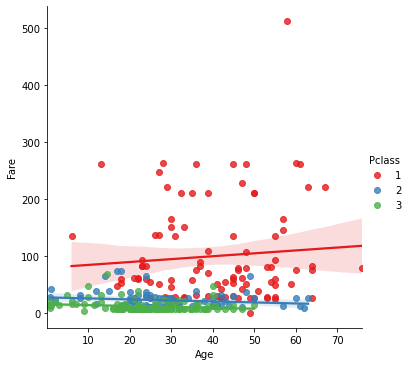

In [26]:
g= sns.lmplot(x="Age", y="Fare", hue="Pclass", data=df, palette="Set1")

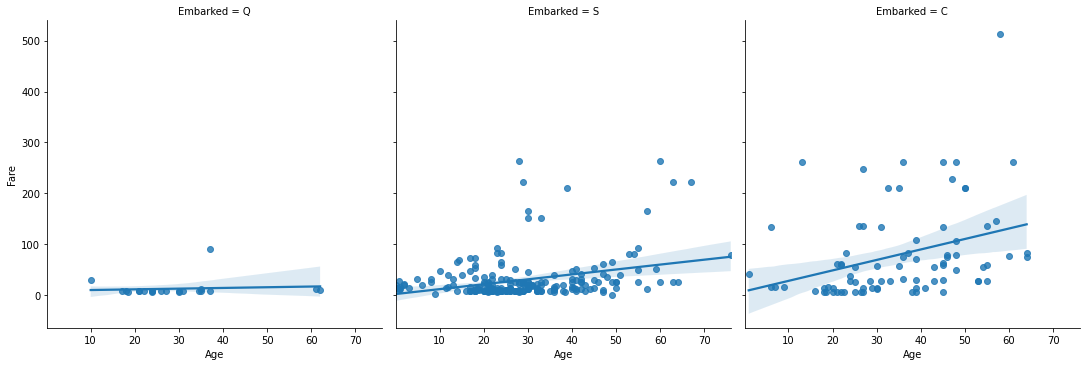

In [27]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=df)

Text(0.5, 1.0, 'ages according gender')

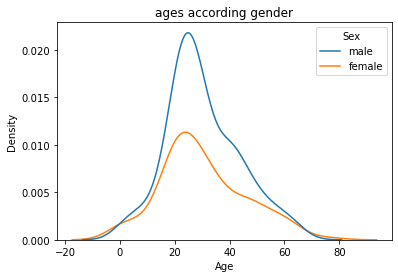

In [28]:
sns.kdeplot(data =df , x ="Age" , hue ="Sex" )
plt.title("ages according gender")

# Data Preprocessing

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [31]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
numarical_columns=df.select_dtypes(include=['int64','float64']).columns
numarical_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [33]:
for column in numarical_columns:
    df[column]=df[column].fillna(df[column].mean())

In [34]:
catagorical_columns=df.select_dtypes(include=['object']).columns
catagorical_columns

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [35]:
for column in catagorical_columns:
    df[column]=df[column].fillna(df[column].mode()[0])

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
x=df.drop(['Survived'],axis=1)

In [39]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [40]:
x.shape

(418, 10)

In [41]:
y=df['Survived']

In [42]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [43]:
y.shape

(418,)

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
X_Sex=pd.get_dummies(x['Sex'], drop_first=True)
X_Ticket=pd.get_dummies(x['Ticket'], drop_first=True)
X_Cabin=pd.get_dummies(x['Cabin'], drop_first=True)
X_Embarked=pd.get_dummies(x['Embarked'], drop_first=True)


In [46]:
x=x.drop(['Sex','Ticket','Cabin','Embarked'],axis=1)

In [47]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50000,0,0,7.8292
1,893,3,47.00000,1,0,7.0000
2,894,2,62.00000,0,0,9.6875
3,895,3,27.00000,0,0,8.6625
4,896,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500
414,1306,1,39.00000,0,0,108.9000
415,1307,3,38.50000,0,0,7.2500
416,1308,3,30.27259,0,0,8.0500


In [48]:
x=pd.concat([x,X_Sex,X_Ticket,X_Cabin,X_Embarked],axis=1)

In [49]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,110489,110813,111163,...,F,F E46,F E57,F G63,F2,F33,F4,G6,Q,S
0,892,3,34.50000,0,0,7.8292,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,47.00000,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,62.00000,0,0,9.6875,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,27.00000,0,0,8.6625,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,3,22.00000,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,39.00000,0,0,108.9000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,38.50000,0,0,7.2500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,3,30.27259,0,0,8.0500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Model Implementation

# Logestic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print("Training set score: {:.1f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.1f}".format(lr.score(X_test, y_test)))
print("Accuracy Score: {:.1f}".format(accuracy_score(y_test,y_pred_lr)))

Training set score: 1.0
Test set score: 1.0
Accuracy Score: 1.0


In [53]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Confusion Matrix: 
 [[50  0]
 [ 0 34]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')

Logistic Regression Accuracy:  100.0%


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [56]:
print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00


In [57]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Confusion Matrix: 
 [[50  0]
 [ 0 34]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Support Vector Classifier

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel="rbf",gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

In [59]:
print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))

Training set score: 0.81
Test set score: 0.63
Accuracy Score: 0.63


In [60]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Confusion Matrix: 
 [[47  3]
 [28  6]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.63      0.94      0.75        50
           1       0.67      0.18      0.28        34

    accuracy                           0.63        84
   macro avg       0.65      0.56      0.52        84
weighted avg       0.64      0.63      0.56        84



# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [62]:
print("Training set score: {:.1f}".format(dtc.score(X_train, y_train)))
print("Test set score: {:.1f}".format(dtc.score(X_test, y_test)))
print("Accuracy Score: {:0.1f}".format(accuracy_score(y_test,y_pred_dtc)))

Training set score: 1.0
Test set score: 1.0
Accuracy Score: 1.0


In [63]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_dtc))
print("Classification_Report: \n",classification_report(y_test,y_pred_dtc))

Confusion Matrix: 
 [[50  0]
 [ 0 34]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

